# Introduction to Dataset
This dataset represents a collection of 20 thousand customer support cases from DELL, detailing various aspects of customer interactions and product support inquiries. Each record in the dataset corresponds to a unique support case, capturing information such as the time and date of case creation and closure, the method of contact, and details about the product and issue at hand. The data includes several encoded identifiers for different tags and descriptions, indicating the type of issues or products involved. Additional information like the country of the customer, the age of the system or product, the number of interactions, and warranty status is also included. This rich dataset provides a comprehensive overview of customer support journeys, offering insights into the efficiency and effectiveness of the support process, as well as customer satisfaction. The ultimate goal of analyzing this dataset is to understand and improve customer service experiences by identifying patterns and key factors that contribute to successful or unsatisfactory customer journeys.

# Objective
1. Perform in-depth Exploratory Data Analysis
2. Train Customer Support Journey embeddings to identify journeys with similar characteristics.
3. Develop a Customer Journey Score to differentiate between highly satisfactory and unsatisfactory customer journeys.
4. Identify potential improvements in customer support workflows to enhance customer satisfaction.

# Exploratory Data Analysis
This notebook specifically focuses on the Exploratory Data Analysis of the Dataset.

## Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler

plt.style.use('seaborn-v0_8-pastel')
sns.set_palette("pastel")

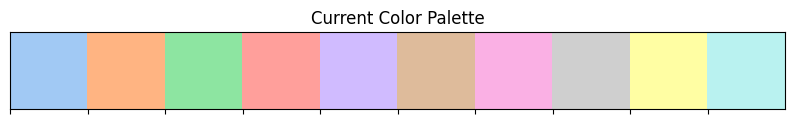

In [31]:
# Get the current color palette
current_palette = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot the colors in the palette
sns.palplot(current_palette)
plt.title("Current Color Palette")
plt.show()

## Data Reading

In [32]:
data = pd.read_csv("/content/Dell Customer Care.csv")
data.head()

,case_nbr,created_dts,created_date,closed_date,close_dts,contact_method,prod_desc,country_name,system_age,total_inbound_count,commodity_desc,total_activity_count,warranty_status,warranty_type
0,1,10:50:51,1/19/2018,01/22/2018,23:09:40,Email Support,8,United Kingdom,677,4.0,1,9.0,0,90 Days
1,2,21:02:40,1/1/2018,01/05/2018,3:30:10,Telephone Helpline,4,New Zealand,1738,13.0,1,7.0,1,3 Year
2,3,4:31:25,8/16/2019,08/18/2019,16:31:06,Telephone Helpline,7,United States,56,4.0,0,8.0,1,2 Year
3,4,12:52:23,9/15/2018,09/20/2018,17:23:00,Telephone Helpline,8,United States,1075,3.0,1,5.0,0,2 Year
4,5,5:50:36,11/22/2018,11/24/2018,5:28:38,Telephone Helpline,11,United States,138,3.0,0,5.0,0,3 Year


##Exploration of Different Features
In this section We will try to analyze all important features, We will detect and reduce the outliers, further we will be able to draw our initial conclusions about the nature of dataset.

### Box Plot for Numeric Features
The box plot for all numeric features shows that their are some outliers influence in the features. We will be clearing these outliers with Z-score filtering, with a normal threshold.

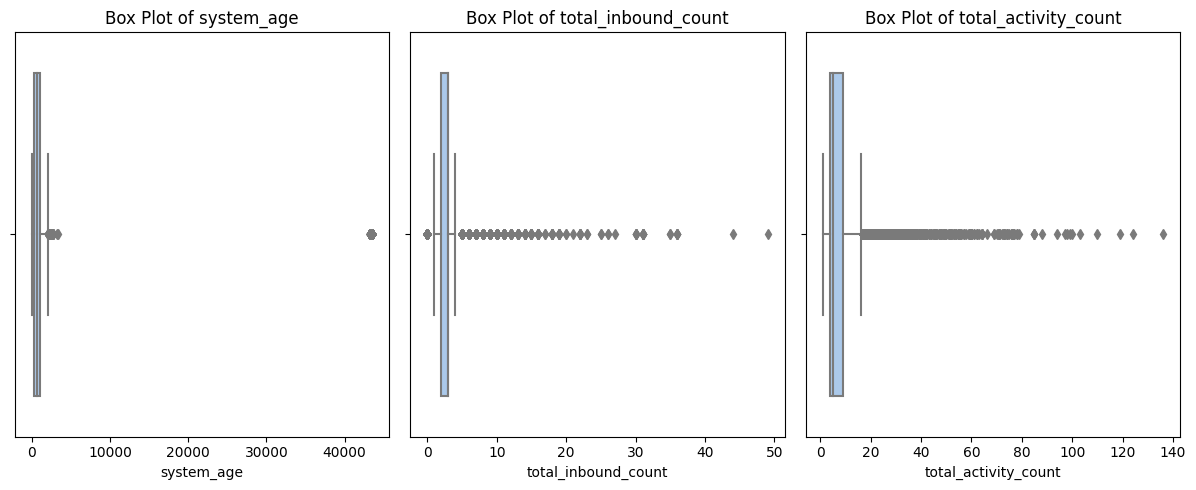

In [33]:
columns_to_check = ['system_age', 'total_inbound_count', 'total_activity_count' ]
plt.figure(figsize=(12, 5))

# Create a box plot for each numerical column
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

### Z-score filtering

In [34]:
def remove_outliers(df, column_name):
    z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    return df[np.abs(z_scores) <= 3]

columns_to_clean = ['system_age', 'total_inbound_count', 'total_activity_count']

print("Original dataset shape:", data.shape)

for column in columns_to_clean:
    data = remove_outliers(data, column)

print("Cleaned dataset shape:", data.shape)

Original dataset shape: (20000, 14)
Cleaned dataset shape: (17203, 14)


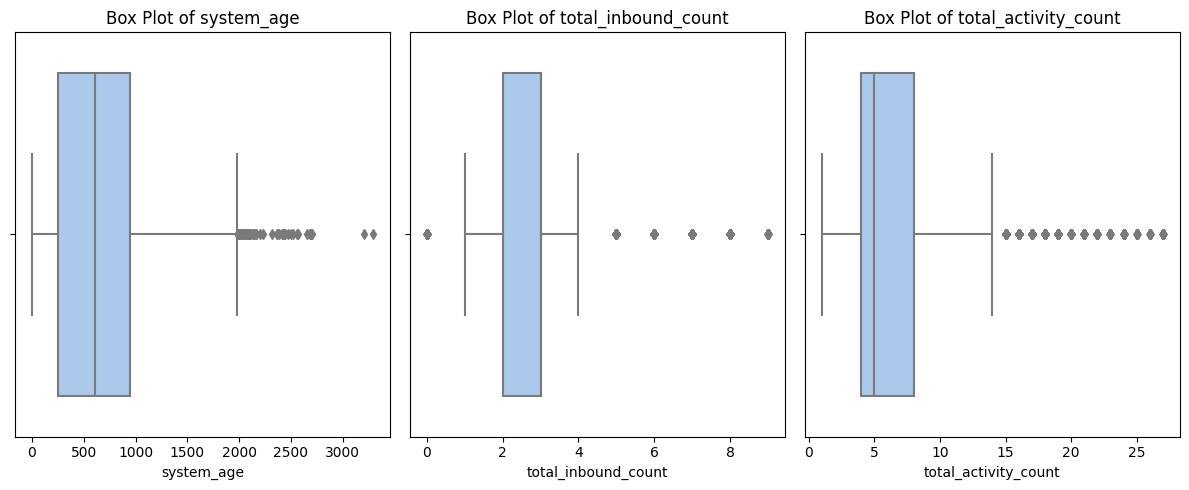

In [35]:
columns_to_check = ['system_age', 'total_inbound_count', 'total_activity_count' ]
plt.figure(figsize=(12, 5))

for i, col in enumerate(columns_to_check, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

### Plotting Other features

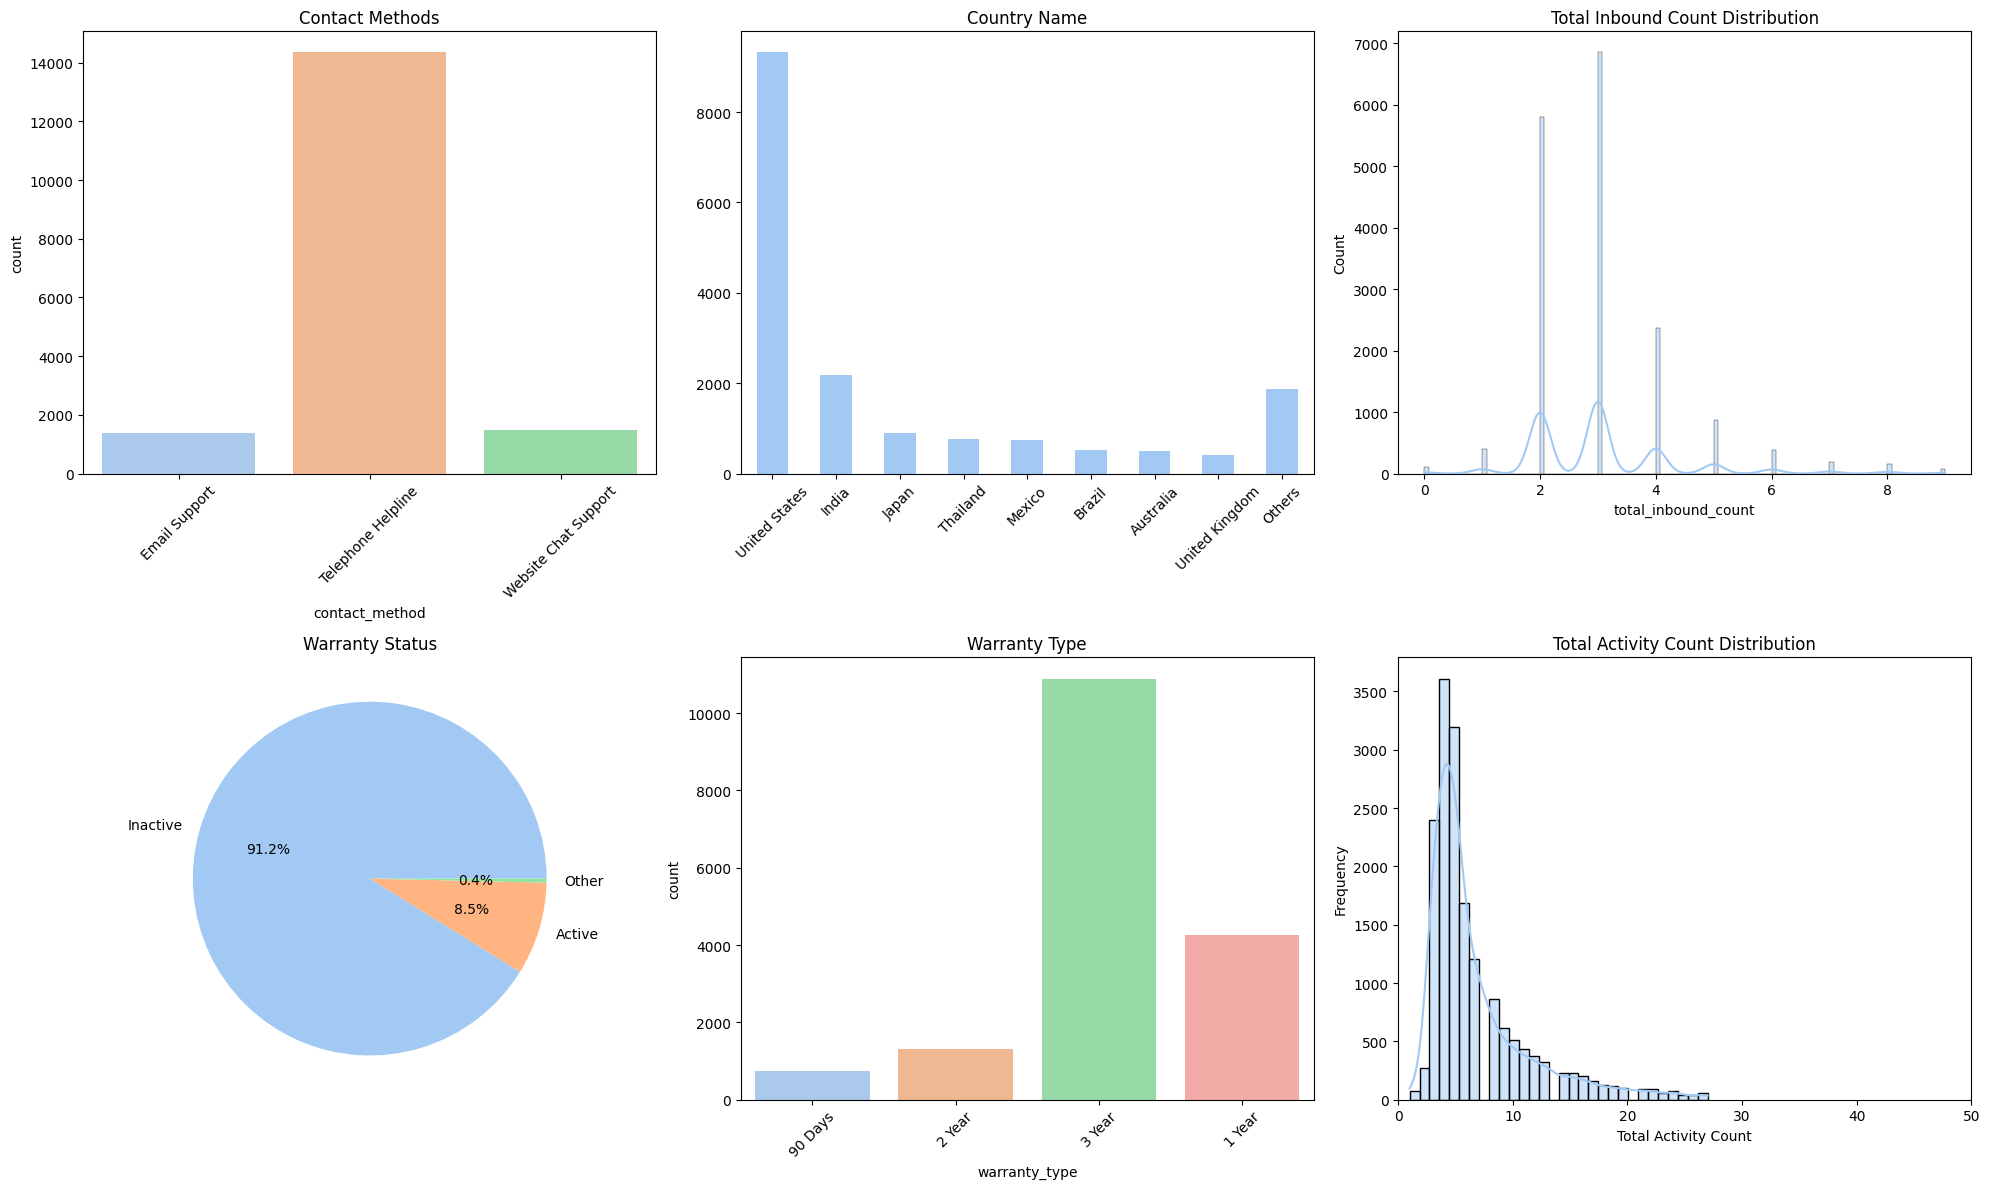

In [36]:
plt.figure(figsize=(20, 12))

# Contact Method Bar Chart
plt.subplot(2, 3, 1)
sns.countplot(x='contact_method', data=data)
plt.title('Contact Methods')
plt.xticks(rotation=45)

# Country Name Bar Chart
plt.subplot(2, 3, 2)
country_counts = data['country_name'].value_counts()
top_countries = country_counts.nlargest(8)
top_countries['Others'] = country_counts.iloc[8:].sum()
top_countries.plot(kind='bar')
plt.title('Country Name')
plt.xticks(rotation=45)

# Total Inbound Count Distribution (with filter < 13)
plt.subplot(2, 3, 3)
sns.histplot(data['total_inbound_count'], kde=True)
plt.title('Total Inbound Count Distribution')

# Warranty Status Pie Chart
plt.subplot(2, 3, 4)
warranty_status_counts = data['warranty_status'].value_counts()
warranty_status_counts.index = ['Active' if i == 1 else 'Inactive' if i == 0 else 'Other' for i in warranty_status_counts.index]
warranty_status_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Warranty Status')
plt.ylabel('')  # Hide y-label

# Warranty Type Bar Chart
plt.subplot(2, 3, 5)
sns.countplot(x='warranty_type', data=data)
plt.title('Warranty Type')
plt.xticks(rotation=45)

# Total Activity Count Histogram
plt.subplot(2, 3, 6)
sns.histplot(data['total_activity_count'], bins=30, kde=True)
plt.title('Total Activity Count Distribution')
plt.xlabel('Total Activity Count')
plt.ylabel('Frequency')
plt.xlim(0, 50)  # Limiting the x-axis to 50


plt.tight_layout()

# Show plot
plt.show()

Upon analyzing the graphs, several key insights can be drawn about the customer interactions and services offered by Dell:

1. **Contact Methods Offered by Dell:**

  Dell provides three primary methods for customer support:
  - Email Support
  - Telephone Helpline
  - Website Chat Support
  
  Among these, the **Telephone Helpline Support** emerges as the most frequently utilized method by customers.

2. **Geographical Distribution of Customer Data:**

  A significant portion of the customer data originates from the **United States**, indicating a higher concentration of Dell's customer base in this region.

3. **Total Inbound Customer Interactions:**

  On average, customers initiate around **3 inbound interactions**. This metric provides an insight into the typical engagement level of customers with Dell's support services.

4. **Status of Customer Warranties:**

  A notable observation is that most customers do **NOT** have an active warranty status. This trend might indicate either a large number of out-of-warranty products or a low uptake of extended warranty offers.

5. **Types of Warranties Offered by Dell:**

  Dell provides four distinct warranty packages:
  - 90 Days Warranty
  - 1 Year Warranty
  - 2 Year Warranty
  - 3 Year Warranty
  
  The **3 Year Warranty** package is the most popular choice among customers, suggesting a preference for longer-term warranty coverage.

6. **Total Activity Count (Customer and Company Initiated):**

  The average total activities (including both customer-initiated and company-initiated interactions) are typically less than 10. This figure gives an idea of the overall interaction frequency in customer service scenarios.

## Number of Cases over time
The number of case volumes fluctuates over time but generally stays within a range, most commonly between 10 and 40 cases per day with occasional spikes. There doesn't appear any seasonality or trend. The variablity in case numbers is consistent with no periods of significantly reduced or increased variance.

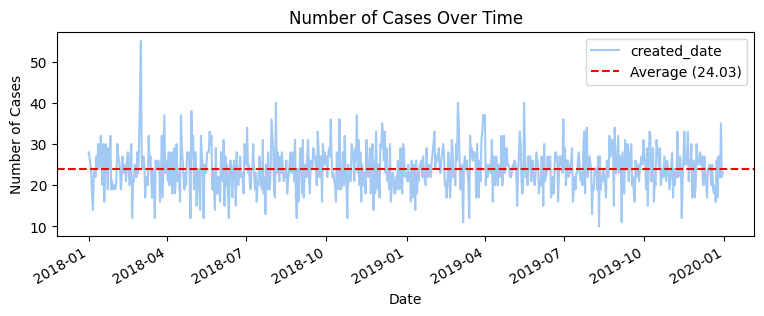

In [37]:
data['created_date'] = pd.to_datetime(data['created_date'])
# Count cases per day
cases_per_day = data['created_date'].value_counts().sort_index()
# Calculate the mean
average_cases = cases_per_day.mean()

# Plot
plt.figure(figsize=(9, 3))
cases_per_day.plot()
plt.axhline(y=average_cases, color='r', linestyle='--', label=f'Average ({average_cases:.2f})')
plt.title('Number of Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

## Case Resolution
Analyzing the time it takes to resolve cases is crucial in identifying patterns within the company. Are there specific trends associated with cases that are resolved more quickly? This investigation aims to determine which types of cases have shorter resolution times and which ones tend to take longer.

### Average Resolution Time
On Average A case is solved in almost 55 hours.

In [38]:
# Ensure the date and time columns are in string format
data['created_date'] = data['created_date'].astype(str)
data['created_dts'] = data['created_dts'].astype(str)
data['closed_date'] = data['closed_date'].astype(str)
data['close_dts'] = data['close_dts'].astype(str)

# Concatenate the date and time strings and convert to datetime
data['created_datetime'] = pd.to_datetime(data['created_date'] + ' ' + data['created_dts'])
data['closed_datetime'] = pd.to_datetime(data['closed_date'] + ' ' + data['close_dts'])

data['resolution_time'] = (data['closed_datetime'] - data['created_datetime']).dt.total_seconds() / (24 * 3600)


In [39]:
# Compute average resolution time
average_resolution_time = data['resolution_time'].mean()

print(f"Average Resolution Time: {average_resolution_time} days")

Average Resolution Time: 2.5159467798467534 days


### Distribution of Cases Resolution Times w.r.t days
It is seen that majority of cases were solved in the first day, but there are also  more than 25% cases that took 4 days or more.

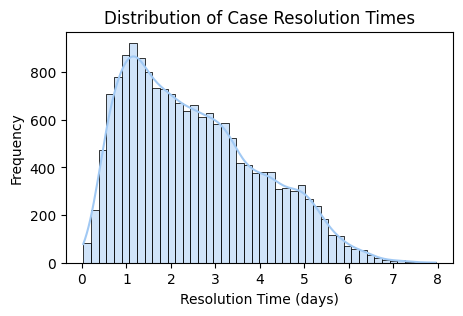

In [40]:
plt.figure(figsize=(5, 3))
sns.histplot(data['resolution_time'], kde=True)
plt.title('Distribution of Case Resolution Times')
plt.xlabel('Resolution Time (days)')
plt.ylabel('Frequency')
plt.show()

### How does resolution time vary over time?
We can see that the DELL consistency stays there over the period of time and there is no specific trend or decline in performance regarding the performance of Team.

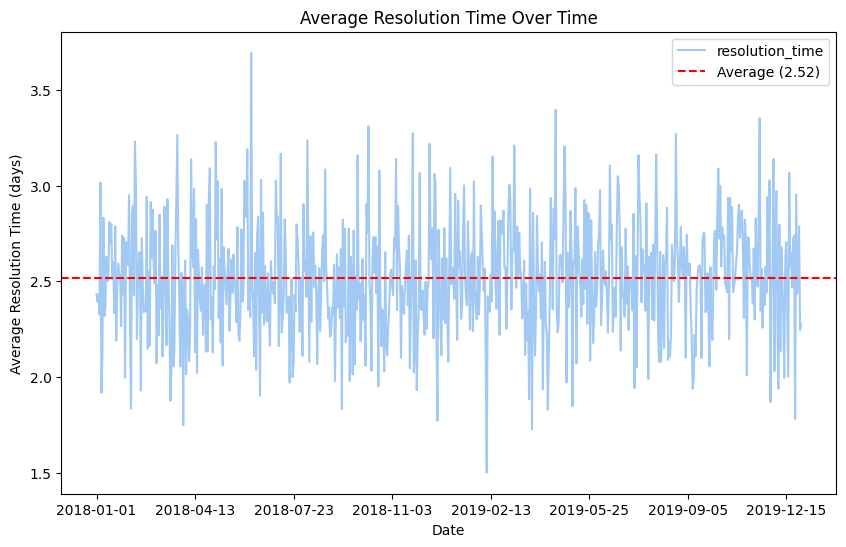

In [41]:
# 1. Resolution Time Over Time
resolution_time_over_time = data.groupby('created_date')['resolution_time'].mean()

# Plot
plt.figure(figsize=(10, 6))
resolution_time_over_time.plot()
plt.axhline(y=average_resolution_time, color='r', linestyle='--', label=f'Average ({average_resolution_time:.2f})')
plt.title('Average Resolution Time Over Time')
plt.xlabel('Date')
plt.ylabel('Average Resolution Time (days)')
plt.legend()
plt.show()

### Prioritizing Customers

We aimed to investigate whether Dell prioritizes its customers based on various factors. Our analysis focused on the following points:

  - Examining Resolution Time Differences Based on Warranty Type.
  - Assessing Resolution Time Differences Based on Warranty Status.
  - Analyzing Resolution Time Differences Based on Contact Method.

Our findings indicate that Dell does **NOT** discriminate against its customers based on factors such as warranty type or status when resolving their issues. Dell has consistently demonstrated fairness and equality in providing customer support across all platforms, including support via email, telephone, and website chat.

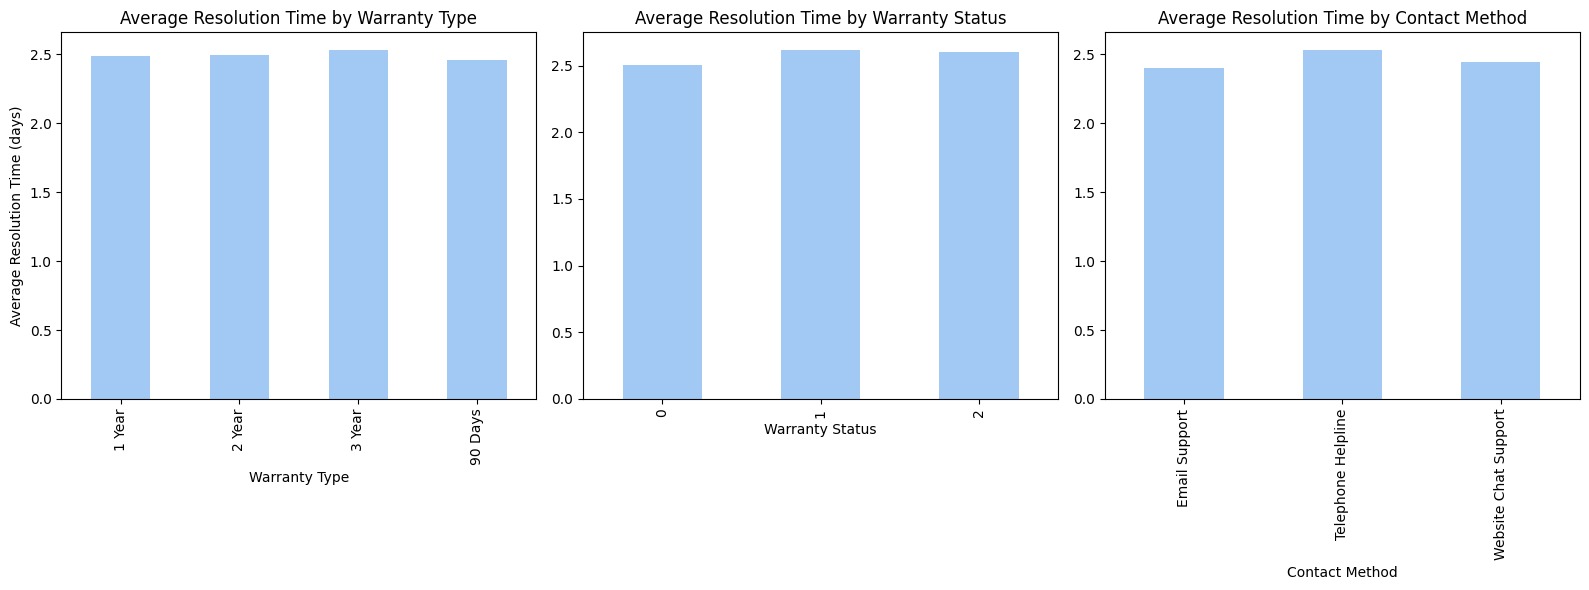

In [42]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
resolution_time_by_warranty_type = data.groupby('warranty_type')['resolution_time'].mean()
resolution_time_by_warranty_type.plot(kind='bar')
plt.title('Average Resolution Time by Warranty Type')
plt.xlabel('Warranty Type')
plt.ylabel('Average Resolution Time (days)')

plt.subplot(1,3,2)
resolution_time_by_warranty_status = data.groupby('warranty_status')['resolution_time'].mean()
resolution_time_by_warranty_status.plot(kind='bar')
plt.title('Average Resolution Time by Warranty Status')
plt.xlabel('Warranty Status')



# Plot
plt.subplot(1,3,3)
resolution_time_by_contact_method = data.groupby('contact_method')['resolution_time'].mean()
resolution_time_by_contact_method.plot(kind='bar')
plt.title('Average Resolution Time by Contact Method')
plt.xlabel('Contact Method')


plt.tight_layout()
plt.show()

### Case Resolution Across the Globe
To gain insights into Dell's performance across various countries, we took into account the influence of different cultures and work environments. Our analysis revealed distinct patterns:

- Dell Italy emerged as the quickest-performing team.
- Conversely, Dell Netherlands, Belgium and New Zealand exhibited a relatively slower performance.

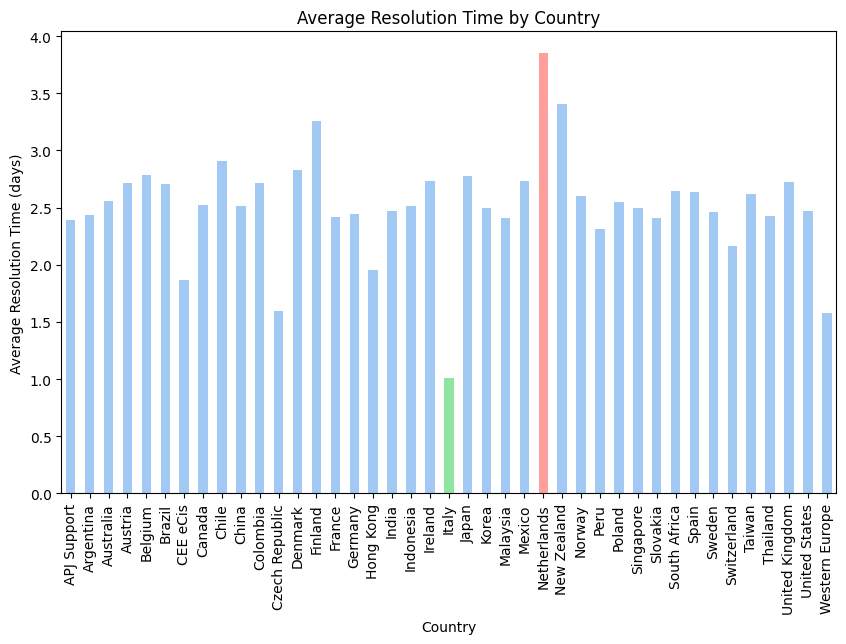

In [43]:
resolution_time_by_country = data.groupby('country_name')['resolution_time'].mean()

min_resolution_time_country = resolution_time_by_country.idxmin()
max_resolution_time_country = resolution_time_by_country.idxmax()

# Create a color list, using the default pastel color
bar_colors = [current_palette[0] for _ in range(len(resolution_time_by_country))]

# Update colors for min and max
bar_colors[resolution_time_by_country.index.get_loc(min_resolution_time_country)] = current_palette[2]
bar_colors[resolution_time_by_country.index.get_loc(max_resolution_time_country)] = current_palette[3]

# Plot
plt.figure(figsize=(10, 6))
resolution_time_by_country.plot(kind='bar', color=bar_colors)
plt.title('Average Resolution Time by Country')
plt.xlabel('Country')
plt.ylabel('Average Resolution Time (days)')
plt.show()

### Case Resolution based on Ibound Interactions
In the Sales Department, it's well understood that the influx of inbound customer interactions can place considerable demands on the Care Center Support team. It can be seen that Cases having more resolution time tends to show more inbound interactions.

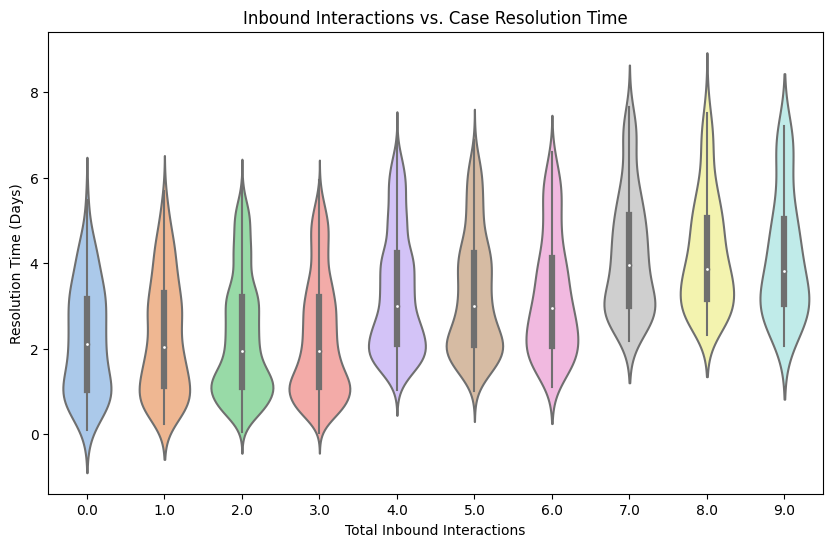

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='total_inbound_count', y='resolution_time', data=data)
plt.title('Inbound Interactions vs. Case Resolution Time')
plt.xlabel('Total Inbound Interactions')
plt.ylabel('Resolution Time (Days)')
plt.show()

## Case Frequency

An important aspect of our analysis involved identifying trends in Case frequency, particularly when customers are most inclined to contact Dell for Support. We aimed to discern patterns in high call volumes as well as low activity periods. This examination allows us to gain a comprehensive understanding of customer engagement patterns, enabling Dell to allocate resources efficiently and enhance customer support during peak hours.

### Case Frequency by Time of Day
We can observe that The **Lowest Number** of cases are reported in the very early hours of the dat (from midnight to around 7 AM). Then there is a gradual increase in case frequency which corresponds to the beginning of business hours. The **Highest Number** of cases peak around **2PM to 4PM**. Then there is a slight increase again around **10PM to 11PM**.

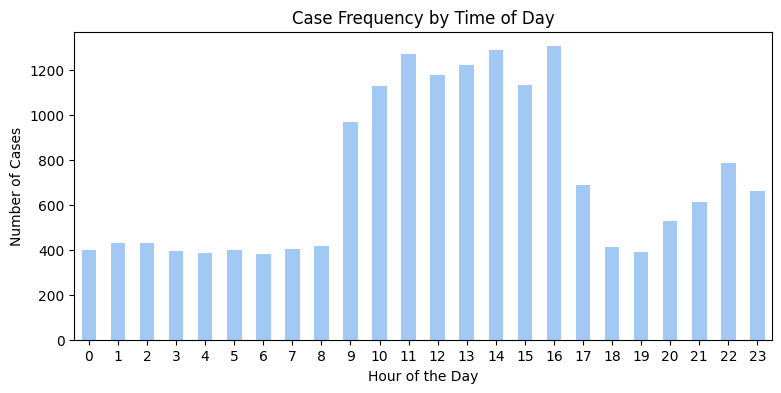

In [49]:
data['hour_of_day'] = pd.to_datetime(data['created_dts'], format='%H:%M:%S').dt.hour

# Count cases per hour of the day
cases_per_hour = data['hour_of_day'].value_counts().sort_index()

# Plot
plt.figure(figsize=(9, 4))
cases_per_hour.plot(kind='bar')
plt.title('Case Frequency by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()

### Case Frequency by Day of Week
We can see the consistency of Customer support throughout the week, with Wednesday having minimum frequency.

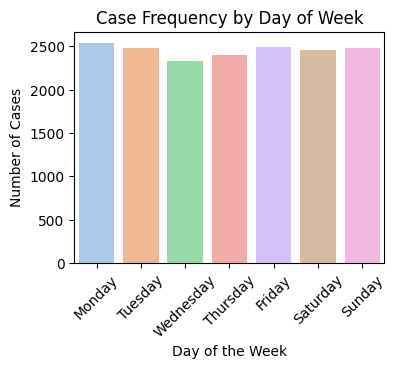

In [50]:
# Extract day of the week from created_date
data['created_date'] = pd.to_datetime(data['created_date'])
data['day_of_week'] = data['created_date'].dt.day_name()
# Count cases per day of the week
cases_per_day_of_week = data['day_of_week'].value_counts()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Reindex the cases_per_day_of_week series to follow the day_order
cases_per_day_of_week = cases_per_day_of_week.reindex(day_order)

plt.figure(figsize=(4, 3))
sns.barplot(x=cases_per_day_of_week.index, y=cases_per_day_of_week.values)
plt.title('Case Frequency by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

### Heatmaps for Case Frequency
The Frequency of Customer Support Cases can be further observed in great details when comes in relationships with different variables. Some of important heatmaps are shown below:
- Heatmap of Case Frequency by Day of Week and Hour of Day
- Heatmap of Case Frequency by Month and Day of Week
- Heatmap of Case Frequency by Year and Month

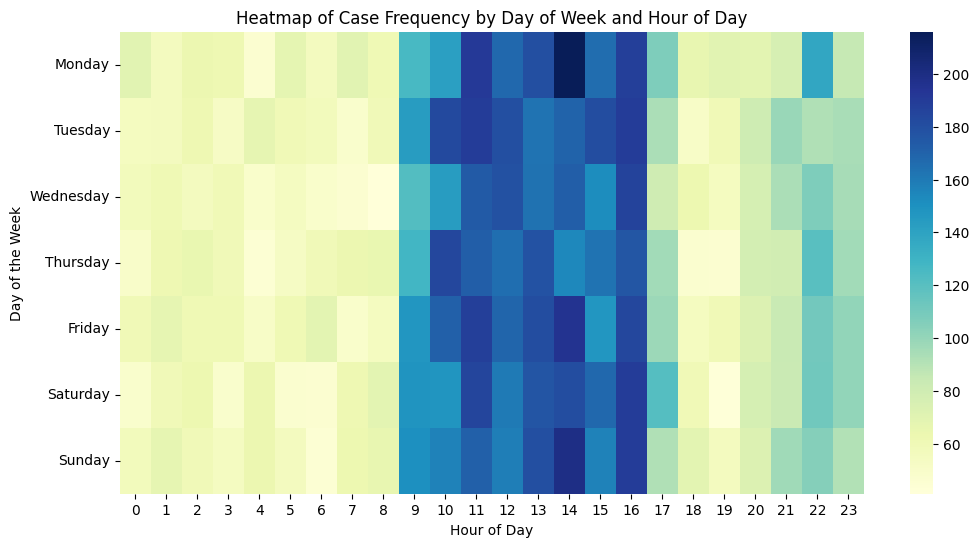

In [51]:
# Create a pivot table with days of the week and hours of the day
pivot_table = data.pivot_table(index='day_of_week', columns='hour_of_day', values='case_nbr', aggfunc='count')

# Sort the index to order the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(day_order)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Case Frequency by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')
plt.show()

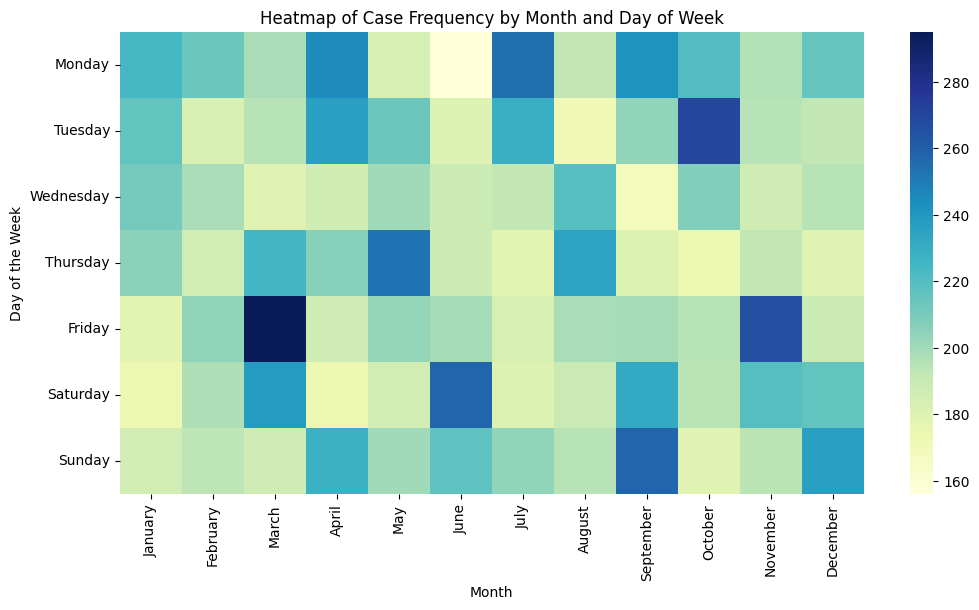

In [53]:
# Extract month from the created_date
data['month'] = data['created_date'].dt.month_name()

# Create a pivot table with month and day_of_week
month_day_pivot = data.pivot_table(index='day_of_week', columns='month', values='case_nbr', aggfunc='count')

# Sort the index and columns
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_day_pivot = month_day_pivot.reindex(index=day_order, columns=month_order)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(month_day_pivot, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Case Frequency by Month and Day of Week')
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.show()

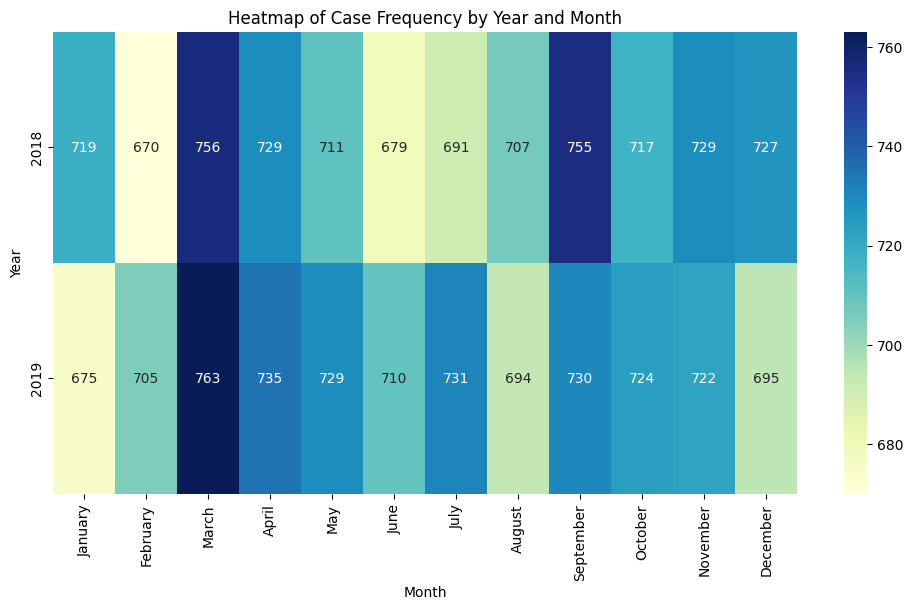

In [54]:
# Extract year from the created_date
data['year'] = data['created_date'].dt.year

# Create a pivot table with year and month
year_month_pivot = data.pivot_table(index='year', columns='month', values='case_nbr', aggfunc='count')

# Sort the columns
year_month_pivot = year_month_pivot[month_order]

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(year_month_pivot, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Heatmap of Case Frequency by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()